<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [93]:
NAME = 'Arash Ghavami'
STUDENT_NUMBER = '402106359'

# Libraries

In [94]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import combinations

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [95]:
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [96]:
def plot_graph(graph, path=None, explored=None):
    G = nx.Graph(graph)
    pos = nx.spring_layout(G, seed=42)
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')


    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')
    plt.show()


# DFS

In [97]:
def dfs(graph, start, goal):

    stack = [(start, [start])]
    visited = set()
    path, explored = None, None
    visited.add(start)
    while stack:
      current_node, current_path = stack.pop()
      if(current_node == goal):
          path = current_path
          explored = visited
          break
      for node in graph[current_node]:
        if node not in visited:
          visited.add(node)
          stack.append((node, current_path + [node]))
    return path, explored


# BFS

In [98]:
def bfs(graph, start, goal):

    path, explored = None, None
    queue = [(start, [start])]
    visited = set()
    visited.add(start)
    while queue:
        current_node, current_path = queue.pop(0)
        if current_node == goal:
            path = current_path
            explored = visited
            break
        for node in graph[current_node]:
            if node not in visited:
                visited.add(node)
                queue.append((node, current_path + [node]))

    return path, explored


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

Your Answer: First about time complexity, DFS has the time o($b^m$) and BFS has the time o($b^d$) which m is the maximum depth that algorithm has gone and is the depth of the goal. obviously $d<=m$ so it means that BFS has a better time. But usually in AI questions time is not that neccessary to us and space is more imptortant. DFS uses o(bm) of the space and BFS uses o($b^d$) which this option for DFS is really more important and better than BFS. DFS has another disadvantage too. That it does not give us an optimal path. It just provides us a path to goal and this path is not neccessarily optimal. but BFS always provides the optimal path. We can use some ideas for combining the good space of DFS and optimality of BFS and have some algorithms like IDS that has both features.

# A star


In [99]:
def manhattan_distance(a, b, pos):
    pos_x_dif = abs(pos[a][0] - pos[b][0])
    pos_y_dif = abs(pos[a][1] - pos[b][1])
    return pos_x_dif + pos_y_dif


def random_heuristic(a, b, pos):
    return random.randint(1, 10)

def a_star(graph, start, goal, heuristic, pos):
    path, explored = None, None
    visited = set()
    priority_q = [(heuristic(0, goal,pos),0, start, [start])]
    visited.add(start)

    while priority_q:
        total_estimate_cost, current_cost, current_node, current_path = heapq.heappop(priority_q)
        if current_node == goal:
            path = current_path
            explored = visited
            break
        for node in graph[current_node]:
            if node not in visited:
                visited.add(node)
                cost_g = current_cost+graph[current_node][node]
                heapq.heappush(priority_q, (cost_g + heuristic(node, goal, pos),cost_g, node, current_path+[node]))

    return path, explored


# Results

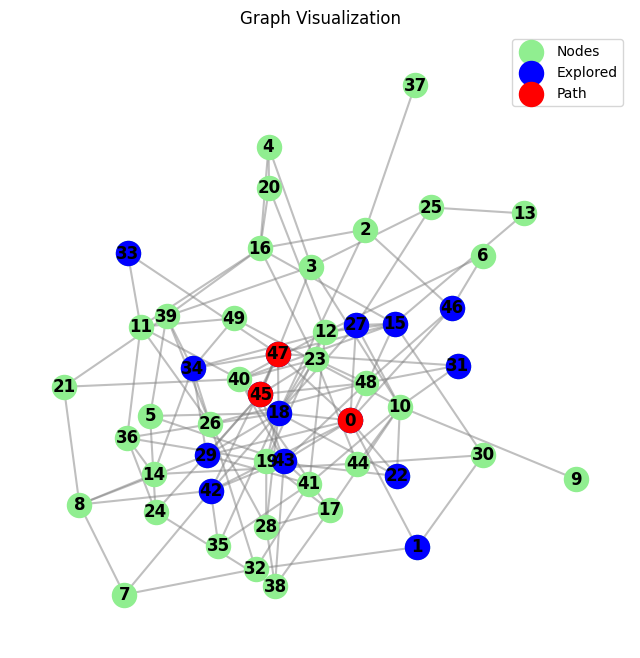

DFS Path: [0, 47, 45]


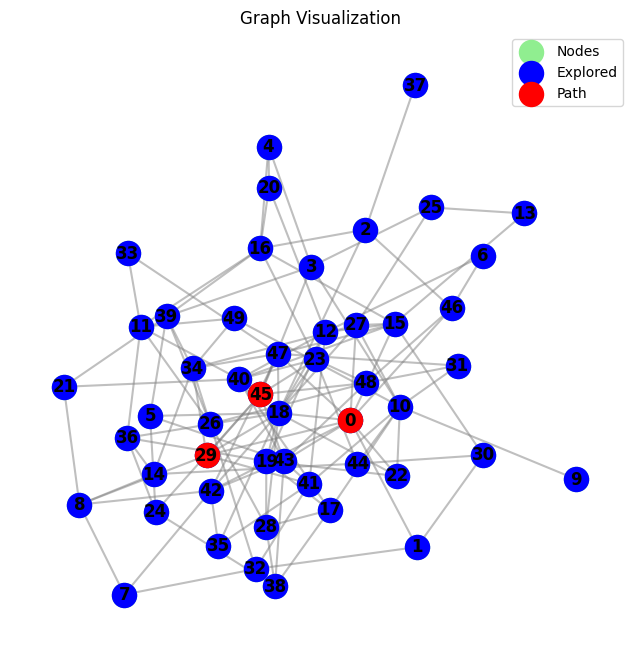

BFS Path: [0, 29, 45]


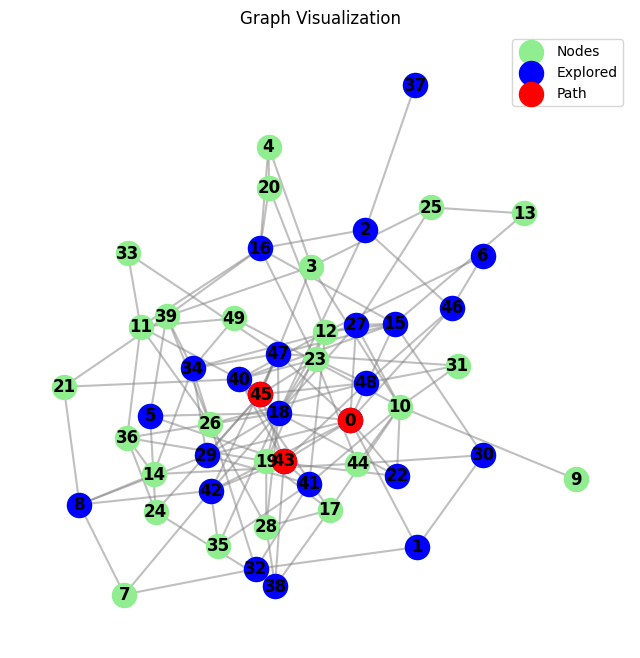

A* Path with Random Heuristic: [0, 43, 45]


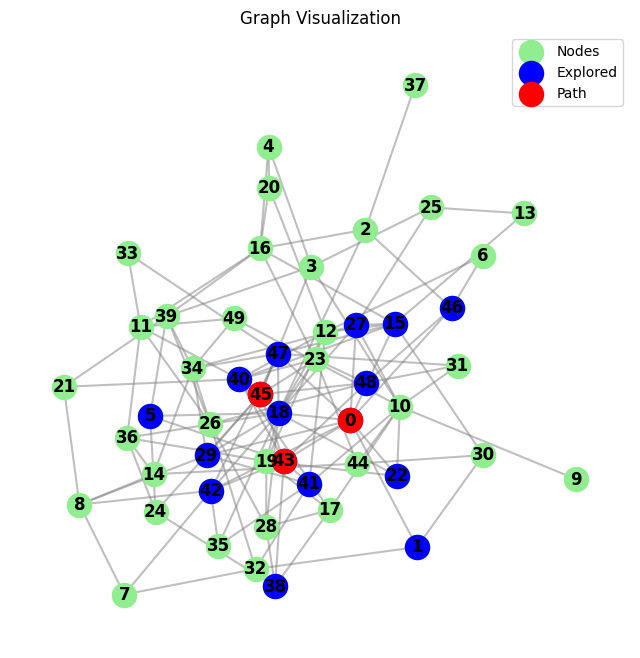

A* Path with Manhattan Distance Heuristic: [0, 43, 45]


In [100]:
num_nodes = 50
start_node = 0
goal_node = 45

random_graph = generate_random_graph(num_nodes)

positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")

**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

Your Answer: This algorithm has more intelligence than uninformed algorithms. It uses the heuristic function to avoid expanding far away and obviously bad nodes. Of course the Manhattan Distance heuristic is better than the random one. Because Manhattan Distance function is consistent and admissible. So the final path that it gives us is optimal.

# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [101]:
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph


In [102]:
def plot_graph(graph, path=None, explored=None):

    G = nx.Graph(graph)
    pos = nx.spring_layout(G, seed=42)
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)

    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')
    plt.show()


# DFS With Cost

In [103]:
def dfs_weighted(graph, start, goal):
    stack = [(start, [start])]
    visited = set()
    visited.add(start)
    path, wheight_sum = None, 0
    while stack:
        current_node, current_path = stack.pop()
        if current_node == goal:
          path = current_path
          break
        for node in graph[current_node]:
          if node not in visited:
            visited.add(node)
            stack.append(([node, current_path + [node]]))
    for i in range(len(path)-1):
        wheight_sum += graph[path[i]][path[i+1]]

    return path, wheight_sum, visited


# BFS With Cost

In [104]:
def bfs_weighted(graph, start, goal):
    queue = [(start, [start])]
    visited = set()
    visited.add(start)
    path, wheight_sum = None, 0
    while queue:
        current_node, current_path = queue.pop(0)
        if current_node == goal:
            path = current_path
            break

        for node in graph[current_node]:
            if node not in visited:
                visited.add(node)
                queue.append((node, current_path + [node]))

    for i in range(len(path)-1):
        wheight_sum += graph[path[i]][path[i+1]]

    return path, wheight_sum, visited

# Dijkstra (UCS)

In [105]:
import heapq
from math import inf

def dijkstra(graph, start, goal):
    priority_queue = [(0, start)]
    distances = {node: inf for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    explored = []

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        if current_node == goal:
            path = []
            weight_sum = current_distance
            node = goal
            while node is not None:
                path.append(node)
                node = previous[node]
            path.reverse()
            return path, weight_sum, explored

        if current_distance > distances[current_node]:
            continue
        explored.append(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    return None, None, explored

# Results

DFS Path: [0, 47, 30, 48, 49, 35, 31, 28, 46, 41, 25, 43, 45]
DFS Weight Sum: 70
BFS Path: [0, 36, 15, 45]
BFS Weight Sum: 21
Dijkstra Path: [0, 36, 16, 35, 31, 5, 37, 43, 45]
Dijkstra Weight Sum: 15


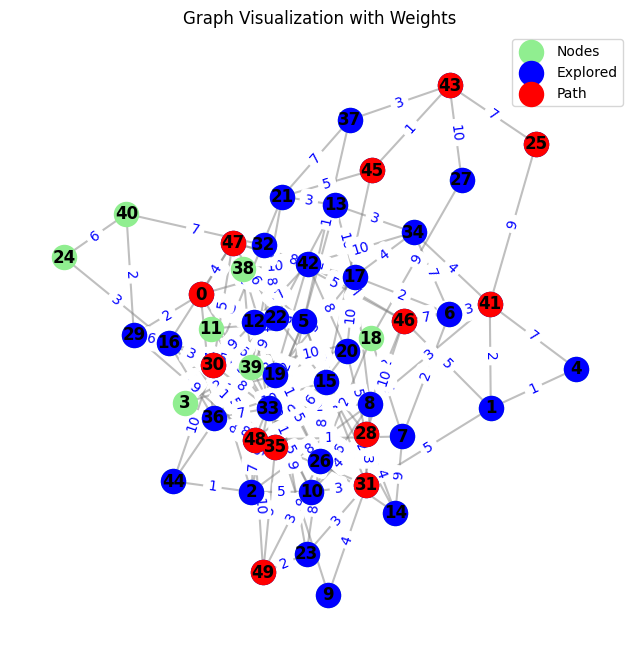

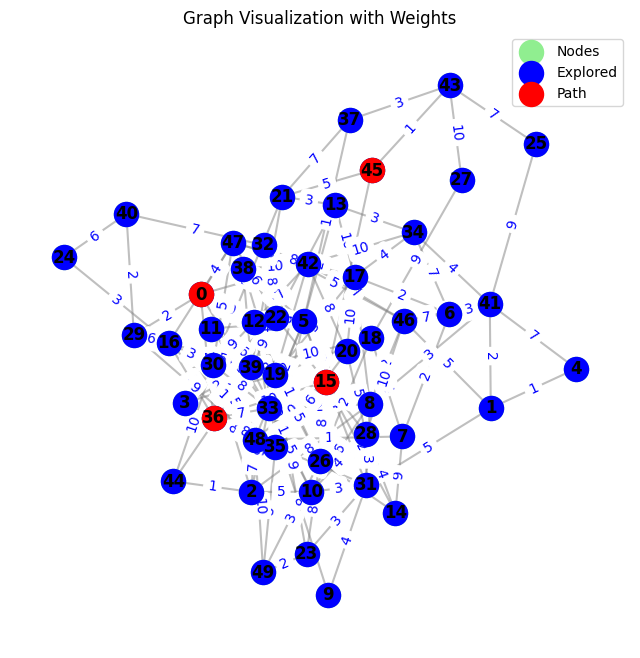

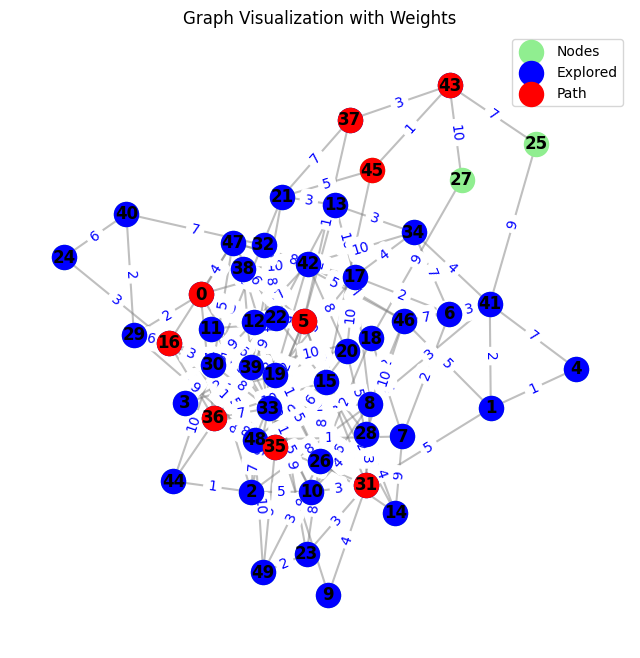

In [106]:
num_nodes = 50
start_node = 0
goal_node = 45

weighted_graph = generate_weighted_graph(num_nodes)

path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

Your Answer: In BFS and DFS algorithm we consider graphs to be unweighed. But in UCS we consider them as weighed graphs and expand nodes that have created less weigh so far. Obviously when our graphs are weighed using UCS is better and gives us the optimal path with less cost.
When the graph is directed, these algorithms may be even not complete!

# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [107]:
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [2, 5, 10, 9, 3, 4, 7, 7, 9, 5, 1, 9, 10, 4, 1]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [108]:
def get_random_solution(nums):
  randomly_ommited_members = random.sample(range(0, len(nums)), random.randint(1,len(nums)))
  new_nums = []
  for i in range(len(nums)):
      if i not in randomly_ommited_members:
        new_nums.append(nums[i])
      else:
        new_nums.append(0)
  return new_nums


def hill_climbing(nums, target_sum):
    new_nums = get_random_solution(nums)
    current_sum = sum(new_nums)
    best_dist = abs(target_sum-current_sum)
    while True:
      boolean = False
      for i in range(len(new_nums)):
        if new_nums[i] == 0:
          current_sum += nums[i]
          if abs(current_sum - target_sum )< best_dist:
            best_dist = abs(current_sum - target_sum)
            new_nums[i] = nums[i]
            boolean = True
          else:
            current_sum -= nums[i]
        else:
          temp_sum = current_sum - new_nums[i]
          if abs(temp_sum - target_sum) < best_dist:
            best_dist = abs(temp_sum - target_sum)
            new_nums[i] = 0
            current_sum -= nums[i]
            boolean = True
      if boolean == False:
        break
      current_solution = new_nums

    return current_solution


# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [109]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]
def split_list(lst, k):
    part1 = lst[:k]
    part2 = lst[k:]
    return part1, part2

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1))
    child11, child12 = split_list(parent1, crossover_point)
    child21, child22 = split_list(parent2, crossover_point)
    child1 = child11 + child22
    child2 = child21 + child12
    return child1, child2

def mutate(solution, nums, mutation_rate=0.1):
    rand = random.randint(0,1)
    if rand < mutation_rate:
      rand = random.randint(0,len(solution)-1)
      if solution[rand] == 0:
        solution[rand] = nums[rand]
      else:
        solution[rand] = 0
    return solution



In [110]:
def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    population = [get_random_solution(nums) for _ in range(population_size)]
    for i in range(generations):
        population.sort(key=lambda x: abs(target_sum - sum(x)))
        if sum(population[0]) == target_sum:
            return population[0]
        parent1 = tournament_selection(population, target_sum)
        parent2 = tournament_selection(population, target_sum)
        if parent1 == parent2:
          i = i-1
          continue

        child1, child2 = crossover(parent1, parent2)

        child1 = mutate(child1, nums, mutation_rate)
        child2 = mutate(child2, nums, mutation_rate)
        population.remove(parent1)
        population.remove(parent2)

        population.append(child1)
        population.append(child2)
    return population[0]

# Brute Force

In [111]:
def generate_all_permutations(nums, result, final_res, index = 0):
    if index == len(nums):
      final_res.append(result.copy())
      return
    result[index] = 0
    generate_all_permutations(nums,result,final_res, index+1)
    result[index] = nums[index]
    generate_all_permutations(nums, result, final_res,index+1)

def brute_force(nums, target_sum):
    all_permutations = []
    generate_all_permutations(nums, [0]*len(nums), all_permutations)
    best_diff = 60
    best_res = [0] * len(nums)
    for i in range(len(all_permutations)):
      if best_diff == 0:
        return best_res
      if(abs(sum(all_permutations[i])-target_sum) < best_diff):
        best_diff = abs(sum(all_permutations[i])-target_sum)
        best_res = all_permutations[i]

    return best_res

# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [112]:
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        target_sum = random.randint(50, 100)
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 20))]
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")


        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 74, Numbers = [5, 1, 6, 8, 8, 9, 2, 10, 2, 2, 2, 2]
Hill Climbing Result: [5, 1, 6, 8, 8, 9, 2, 10, 2, 2, 2, 2], final sum: 57, Time Taken: 0.0001 seconds
Genetic Algorithm Result: [5, 0, 6, 8, 8, 9, 2, 10, 2, 0, 2, 0], final sum: 52, Time Taken: 0.0031 seconds
Brute Force Result: [5, 1, 6, 8, 8, 9, 2, 10, 2, 2, 2, 2], final sum: 57, Time Taken: 0.0028 seconds

Trial 2: Target Sum = 96, Numbers = [8, 5, 3, 7, 5, 4, 5, 6, 9, 2, 7, 6, 2, 3, 7, 9, 6, 4, 9, 6]
Hill Climbing Result: [8, 5, 3, 7, 5, 4, 5, 6, 9, 2, 0, 6, 0, 3, 7, 0, 6, 4, 9, 6], final sum: 95, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [8, 5, 3, 7, 5, 0, 5, 0, 9, 0, 7, 6, 0, 0, 7, 9, 6, 4, 9, 6], final sum: 96, Time Taken: 0.0009 seconds
Brute Force Result: [0, 0, 3, 7, 5, 0, 5, 6, 9, 2, 7, 6, 2, 3, 7, 9, 6, 4, 9, 6], final sum: 96, Time Taken: 0.7870 seconds

Trial 3: Target Sum = 61, Numbers = [1, 3, 6, 4, 10, 10, 4, 8, 4, 8, 1, 4, 6, 6, 3, 3, 1, 5, 7, 5]
Hill Climbing Result: [0, 3, 6, 4, 10

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


Your Answer: The time taken by brute force algorithm is much more than 2 other algorithms. But it will always gives us the best and most optimal answer. So it has the most strength. The disadvantage of the code I have provided for brute force algorithm is that I have used recursive function to create all the possible states. So this may take a large amount of my RAM and for large n it would not execute properly (when is larger that the question's wanted). We could have used some bitmask algorithms to make the space complexity less!
In total using Hill climbing algorithms is better than GA algorithm because by the results above, it would take less time and in most of the cases the final result is nearer to the target_some.